In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap

#### Data Observation, Cleaning

In [32]:
df = pd.read_csv('telco.csv')
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [33]:
df.columns = df.columns.str.strip()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [35]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [36]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [37]:
# changing row values of dependent variable for prediction 

df['Churn Label'] = df['Churn Label'].replace({'No': 0, 'Yes': 1})

C:\Users\Louis Bernal\AppData\Local\Temp\ipykernel_25128\3483657213.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn Label'] = df['Churn Label'].replace({'No': 0, 'Yes': 1})


In [38]:
# add randomize column from the instruction

df['Service_usage'] = np.random.randint(10, 61, size = len(df))

#### Data Visualization

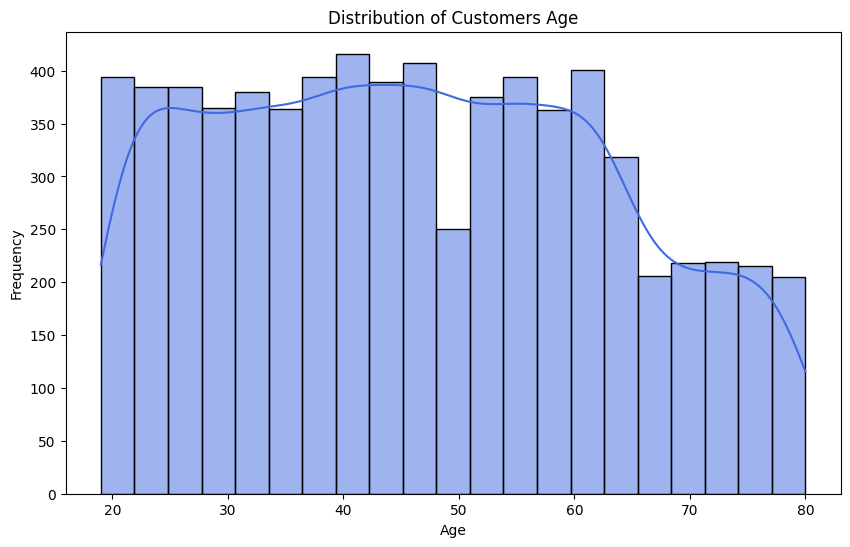

In [39]:
plt.figure(figsize = (10, 6))
sns.histplot(df['Age'], kde=True, color= 'royalblue') 
plt.title('Distribution of Customers Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

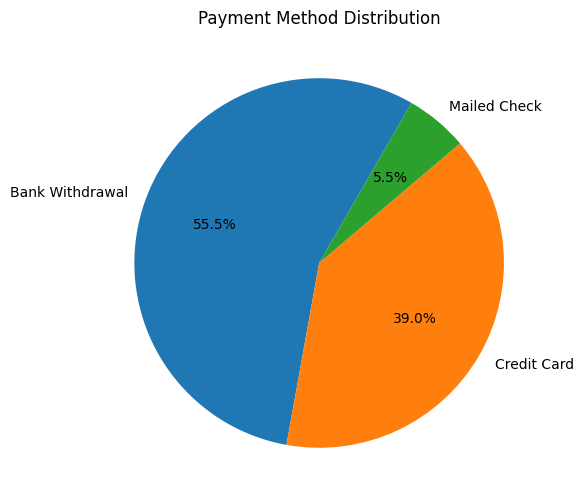

In [40]:
df_payment = df['Payment Method'].value_counts()

plt.figure(figsize = (10, 6))
plt.pie(df_payment, labels = df_payment.index, autopct='%1.1f%%', startangle=60)
plt.title('Payment Method Distribution')
plt.show()

<Axes: >

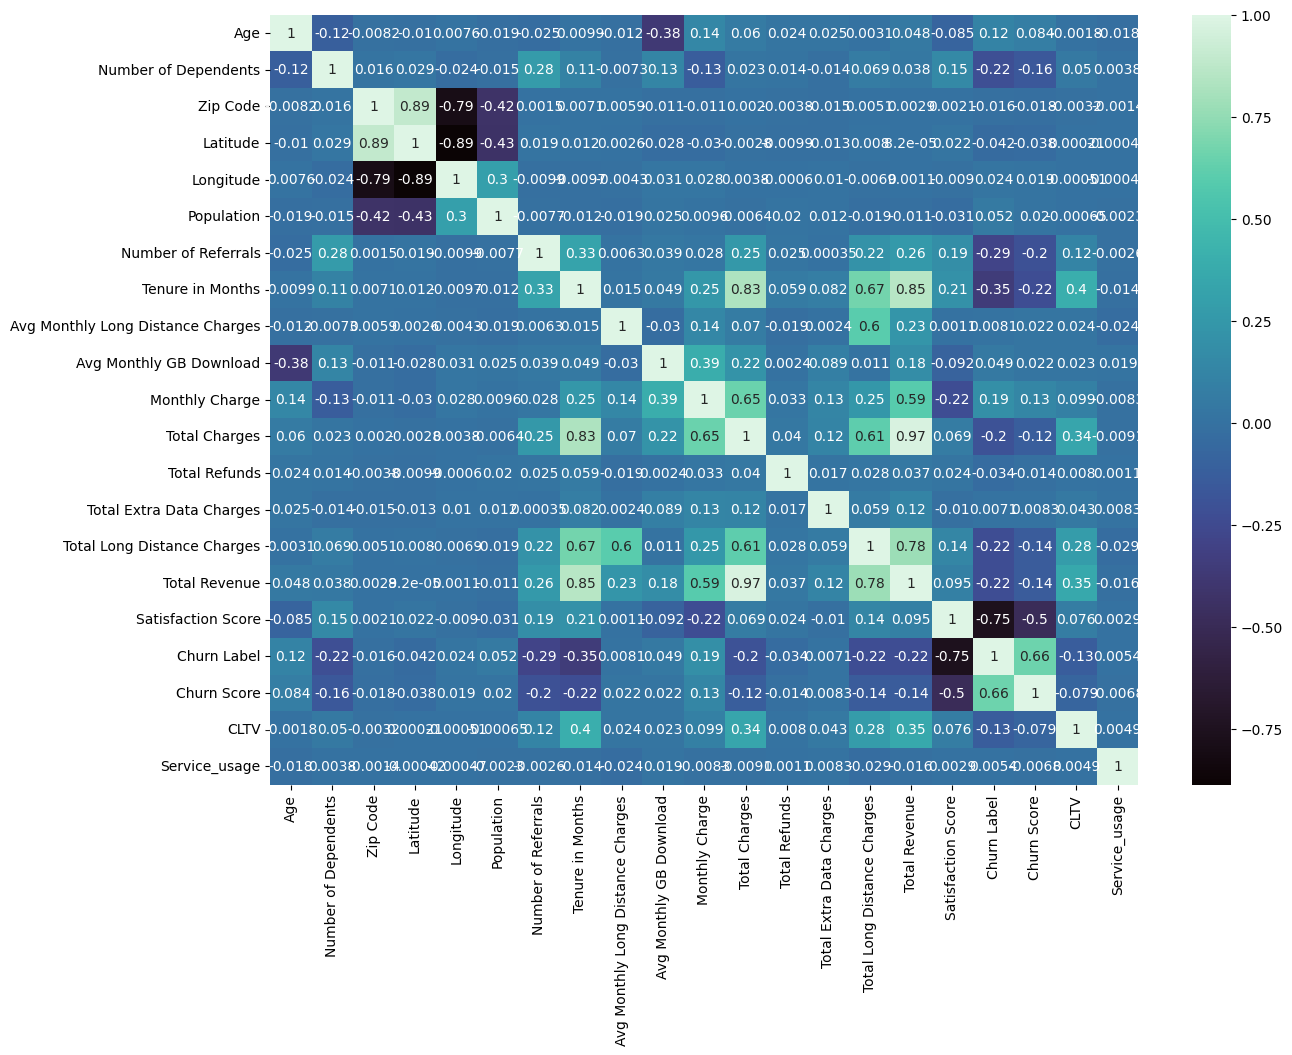

In [41]:
# correlation heatmap

df_num = df.select_dtypes(exclude=['object'])

plt.figure(figsize=(14,10))
sns.heatmap(df_num.corr(), annot = True, cmap="mako")

In [42]:
# high correlation analysis

df_num = df.select_dtypes(exclude=['object'])
correlation_matrix = df_num.corr()
churn_corr = correlation_matrix['Churn Label'].drop('Churn Label')
high_corr = churn_corr[abs(churn_corr) > 0.5]

print(high_corr)

Satisfaction Score   -0.754649
Churn Score           0.660772
Name: Churn Label, dtype: float64


#### Data Preprocessing

In [43]:
# feature engineering important columns

df = df[['Customer ID', 'Age', 'Tenure in Months', 'Payment Method', 'Churn Label','Satisfaction Score', 'Churn Score']]
df

,Customer ID,Age,Tenure in Months,Payment Method,Churn Label,Satisfaction Score,Churn Score
0,8779-QRDMV,78,1,Bank Withdrawal,1,3,91
1,7495-OOKFY,74,8,Credit Card,1,3,69
2,1658-BYGOY,71,18,Bank Withdrawal,1,2,81
3,4598-XLKNJ,78,25,Bank Withdrawal,1,2,88
4,4846-WHAFZ,80,37,Bank Withdrawal,1,2,67
...,...,...,...,...,...,...,...
7038,2569-WGERO,30,72,Bank Withdrawal,0,5,45
7039,6840-RESVB,38,24,Mailed Check,0,3,59
7040,2234-XADUH,30,72,Credit Card,0,4,71
7041,4801-JZAZL,32,11,Bank Withdrawal,0,4,59


In [44]:
df_train = df.drop('Customer ID', axis= 1)

In [45]:
# transform object data into numeric form

label_encoder = LabelEncoder()
df_train['Payment Method Encoded'] = label_encoder.fit_transform(df['Payment Method'])
df_train = df_train.drop('Payment Method', axis=1)

In [46]:
# data splitting

x = df_train.drop(['Churn Label'], axis=1).values
y = df_train['Churn Label'].values

In [47]:
# choosing appopriate test size 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [48]:
# standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
# cross-validation to find optimal k

knn = KNeighborsClassifier()

# Set a range of K values to test
k_values = list(range(80, 101))

# GridSearchCV to find the best K value with 5-fold cross-validation
param_grid = {'n_neighbors': k_values}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Optimal K: {best_k}, with a cross-validated accuracy of: {best_score:.4f}")

Optimal K: 87, with a cross-validated accuracy of: 0.9640


#### Data Modeling


In [50]:
# knn model and 10 neighboors
classifier = KNeighborsClassifier(n_neighbors = best_k, metric ='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=87)

In [51]:
# mettrics to measure prediction

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n {cm}\n')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}\n')
print(f'F1 Score: {f1_score(y_test, y_pred)}\n')
print(f'Recall Score: {recall_score(y_test,y_pred)}')

Confusion Matrix:
 [[999  10]
 [ 58 342]]

Accuracy Score: 0.9517388218594748

F1 Score: 0.9095744680851063

Recall Score: 0.855


Text(0.5, 1.0, 'Confusion Matrix')

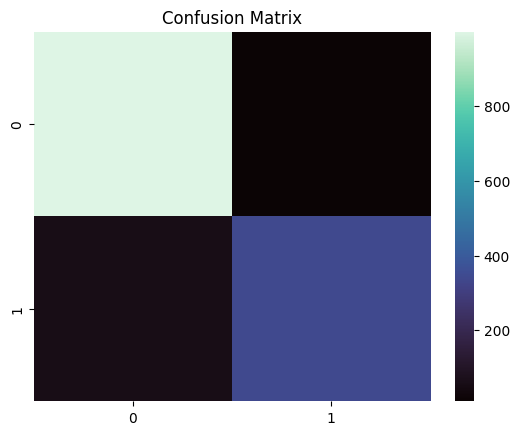

In [52]:
sns.heatmap(cm, cmap ='mako')
plt.title('Confusion Matrix')

C:\Users\Louis Bernal\AppData\Local\Temp\ipykernel_25128\2009011435.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(train_sizes, train_error_mean, 'o-', color="r", label="Train", marker='o')
C:\Users\Louis Bernal\AppData\Local\Temp\ipykernel_25128\2009011435.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(train_sizes, test_error_mean, 'o-', color="g", label="Validation", marker='o')


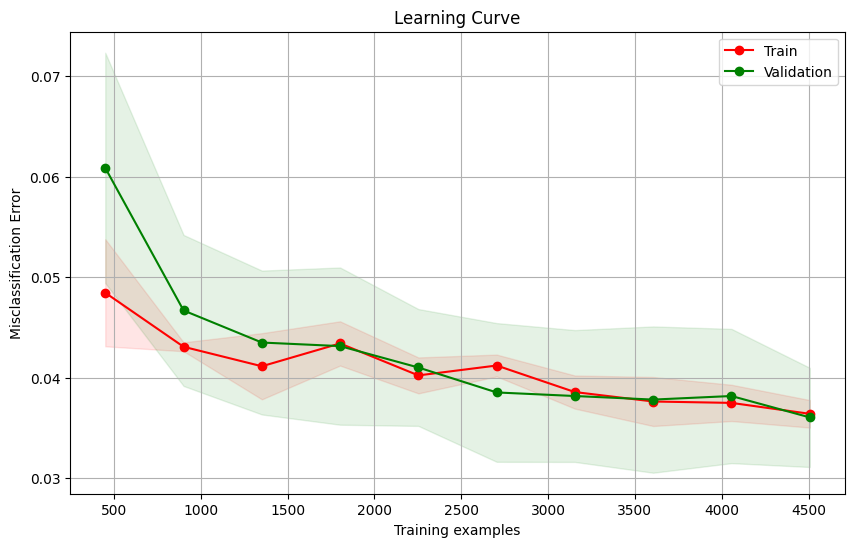

In [53]:
# Function to calculate misclassification error
def misclassification_error(score):
    return 1 - score

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    classifier, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean misclassification error
train_error_mean = misclassification_error(np.mean(train_scores, axis=1))
train_error_std = np.std(misclassification_error(train_scores), axis=1)
test_error_mean = misclassification_error(np.mean(test_scores, axis=1))
test_error_std = np.std(misclassification_error(test_scores), axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Misclassification Error")

# Plot the shaded area for the standard deviation
plt.fill_between(train_sizes, train_error_mean - train_error_std,
                 train_error_mean + train_error_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_error_mean - test_error_std,
                 test_error_mean + test_error_std, color="g", alpha=0.1)

# Plot the mean misclassification error for train and validation
plt.plot(train_sizes, train_error_mean, 'o-', color="r", label="Train", marker='o')
plt.plot(train_sizes, test_error_mean, 'o-', color="g", label="Validation", marker='o')

# Add legend, grid, and show the plot
plt.legend(loc="best")
plt.grid(True)
plt.show()


### Takeaways

1. What specific features from the customer data should be included in the training model to enhance prediction?

     - the highly connected features of 'Satisfaction Score' and 'Churn Score' are added to enhance the model's performance


2. What preprocesing techniques, such as scaling or encoding are essential before fitting the KNN model?

    - the usage of label encoder to transform object data type into numeric and standard scaler 


3. How can you use techniques like cross-validation to optimize the choice of K and prevent overfitting?

    - Since it is a relatively large dataset of more than 7 thousand rows it is important to increase the range of number of k will be used to the model to prevent overfit
    

4. What metrics will you use to evaluate model's performance, and how do these metrics relate to the business impact of customer churn predictions?

    - Various metrics are used to measure the accuracy and fit of the model such as Accuracy, F1 and Recall score are utilized. Also the learning curve model to visualize the good fit of the model. Resulting into high accuracy of 95 and a good fit 

    - Metrics as such mentioned greatly affect the prediction wherein the business would develop their process into the pattern of features used to predict the customer behaviors toward the product or services

    
